In [1]:
import pandas as pd

df2018 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY18') 
df2018.dropna(inplace=True)
df2019 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY19') 
df2019.dropna(inplace=True)
df2020 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY20') 
df2020.dropna(inplace=True)
df2021 = pd.read_excel('/content/AAA_4yr_SalesReport_Bulls_May2021.xlsx', index_col=0, sheet_name='FY21') 
df2021.dropna(inplace=True)

In [2]:
len(df2018.columns),len(df2019.columns),len(df2020.columns),len(df2021.columns)

(34, 34, 34, 34)

In [3]:
df= pd.concat([df2018,df2019,df2020,df2021])

In [5]:
df.columns=['main_price', 'MAIN_SIRE_NAME', 'code_desc', 'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ', 'Original_Animal_Order']

In [6]:
df_reduced = df[['main_price',  'CED EPD', 'BW EPD',
       'WW EPD', 'YW EPD', 'RADG EPD', 'DMI EPD', 'YH EPD', 'SC EPD',
       'Doc EPD', 'HP EPD', 'CEM EPD', 'Milk EPD', 'MW EPD', 'MH EPD', '$EN',
       'CW EPD', 'Marb EPD', 'RE EPD', 'Fat EPD', 'FOOT_ANGLE_EPD',
       'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M', '$F', '$G', '$B', '$C',
       '$AxH', '$AxJ']]
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 893 entries, FY18 to FY21
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   main_price         893 non-null    int64  
 1   CED EPD            893 non-null    float64
 2   BW EPD             893 non-null    float64
 3   WW EPD             893 non-null    float64
 4   YW EPD             893 non-null    float64
 5   RADG EPD           893 non-null    float64
 6   DMI EPD            893 non-null    float64
 7   YH EPD             893 non-null    float64
 8   SC EPD             893 non-null    float64
 9   Doc EPD            893 non-null    float64
 10  HP EPD             893 non-null    float64
 11  CEM EPD            893 non-null    float64
 12  Milk EPD           893 non-null    float64
 13  MW EPD             893 non-null    float64
 14  MH EPD             893 non-null    float64
 15  $EN                893 non-null    float64
 16  CW EPD             893 non-

In [7]:
def heatMap(df):#Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(18, 18))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [8]:
# standarize
def standarize(df, symbols):
    result = df.copy()
    values={}
    for symbol in symbols:
        max_value = df[symbol].max()
        min_value = df[symbol].min()
        mean_value= df[symbol].mean()
        std_value= df[symbol].std()
        result[symbol] = (df[symbol] -mean_value) / std_value
        data={}
        data.update({'max': max_value, 'min':min_value, 'mean':mean_value, 'std':std_value})
        

        values.update({symbol:data})
    return result, values

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import scipy.stats as stats
from sklearn.preprocessing import  LabelEncoder
import pickle

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Distributions
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [10]:

# PyMC3 for Bayesian Inference
import pymc3 as pm
import arviz as az
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [12]:

## suppress install output
%%capture

## install pypi release
# !pip install smogn

## install developer version
!pip install git+https://github.com/nickkunz/smogn.git

In [13]:

## load dependencies
import smogn
import pandas
import seaborn

In [14]:
df_reduced.reset_index(inplace=True)

In [15]:
df_reduced.columns

Index(['FY', 'main_price', 'CED EPD', 'BW EPD', 'WW EPD', 'YW EPD', 'RADG EPD',
       'DMI EPD', 'YH EPD', 'SC EPD', 'Doc EPD', 'HP EPD', 'CEM EPD',
       'Milk EPD', 'MW EPD', 'MH EPD', '$EN', 'CW EPD', 'Marb EPD', 'RE EPD',
       'Fat EPD', 'FOOT_ANGLE_EPD', 'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M',
       '$F', '$G', '$B', '$C', '$AxH', '$AxJ'],
      dtype='object')

In [16]:
df_reduced.drop('FY', axis=1, inplace=True)

In [17]:
df_reduced.isnull().sum()

main_price           0
CED EPD              0
BW EPD               0
WW EPD               0
YW EPD               0
RADG EPD             0
DMI EPD              0
YH EPD               0
SC EPD               0
Doc EPD              0
HP EPD               0
CEM EPD              0
Milk EPD             0
MW EPD               0
MH EPD               0
$EN                  0
CW EPD               0
Marb EPD             0
RE EPD               0
Fat EPD              0
FOOT_ANGLE_EPD       0
FOOT_CLAW_SET_EPD    0
pap_epd              0
$W                   0
$M                   0
$F                   0
$G                   0
$B                   0
$C                   0
$AxH                 0
$AxJ                 0
dtype: int64

In [18]:

## specify phi relevance values
rg_mtrx = [

    [29000,  0, 0],  ## under-sample
    [35000, 0, 0],  ## under-sample ("majority")
    [50000, 0, 0], ##over-sample ("minority")
    [300000, 1, 0],  ## over-sample ("minority")
    [400000, 1, 0],  ## over-sample ("minority")
    [500000, 1, 0],  ## over-sample ("minority")
    [700000, 1, 0],  ## over-sample ("minority")
    [800000, 1, 0],  ## over-sample ("minority")
    [900000, 1, 0],  ## over-sample ("minority")
    [1500000, 1, 0],  ## over-sample ("minority")
]

In [19]:
## conduct smogn
df_reduced_smogn = smogn.smoter(
    
    ## main arguments
    data = df_reduced,           ## pandas dataframe
    y = 'main_price',          ## string ('header name')
    k = 3,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)

# ## conduct smogn
# df_reduced_smogn = smogn.smoter(
    
#     data = df_reduced_cat1,  ## pandas dataframe
#     y = 'main_price'  ## string ('header name')
# )

r_index: 100%|##########| 8/8 [00:00<00:00, 325.08it/s]


In [21]:
df_reduced.corr(method="pearson")['main_price'].sort_values(ascending=False)

main_price           1.000000
Marb EPD             0.098868
$G                   0.098054
$B                   0.080669
Doc EPD              0.069920
$C                   0.067338
$AxH                 0.048399
MW EPD               0.042879
WW EPD               0.039639
CW EPD               0.036868
$AxJ                 0.035251
$F                   0.032471
YW EPD               0.030981
RE EPD               0.030468
RADG EPD             0.023116
DMI EPD              0.010018
CED EPD              0.003264
MH EPD               0.001091
Fat EPD             -0.005044
$W                  -0.008584
FOOT_CLAW_SET_EPD   -0.011401
YH EPD              -0.011854
BW EPD              -0.011886
CEM EPD             -0.020578
$M                  -0.023400
FOOT_ANGLE_EPD      -0.028001
$EN                 -0.028405
SC EPD              -0.039958
pap_epd             -0.045014
HP EPD              -0.053048
Milk EPD            -0.069346
Name: main_price, dtype: float64

In [22]:
df_reduced_smogn.columns


Index(['main_price', 'CED EPD', 'BW EPD', 'WW EPD', 'YW EPD', 'RADG EPD',
       'DMI EPD', 'YH EPD', 'SC EPD', 'Doc EPD', 'HP EPD', 'CEM EPD',
       'Milk EPD', 'MW EPD', 'MH EPD', '$EN', 'CW EPD', 'Marb EPD', 'RE EPD',
       'Fat EPD', 'FOOT_ANGLE_EPD', 'FOOT_CLAW_SET_EPD', 'pap_epd', '$W', '$M',
       '$F', '$G', '$B', '$C', '$AxH', '$AxJ'],
      dtype='object')

In [23]:
try:
  df_reduced_smogn.drop("level_0", axis=1,inplace=True)
except:
  pass

In [25]:
best_features=['main_price', 'Marb EPD','$G','$B','Doc EPD','$C','$AxH' ,'Milk EPD','HP EPD','pap_epd']
df_reduced_smogn=df_reduced_smogn[best_features]

In [26]:
labels=df_reduced_smogn['main_price'] 
df_reduced_smogn.columns=['main_price','Marb_EPD','G','B','Doc_EP','C','AxH' ,'Milk_EPD','HP_EPD','pap_epd']

In [27]:
cols=list(df_reduced_smogn.columns)
df_normalized, dict_values=standarize(df_reduced_smogn,cols)


### Baseiline Different Predictors

In [28]:

# Split into training/testing sets with 25% split. 
X_train, X_test, y_train, y_test = train_test_split(df_normalized, np.log(labels), 
                                                   
                                                    test_size = 0.20,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(1250, 10)
(313, 10)


In [29]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    r2 = r2_score(true,predictions)
    
    return mae, rmse, r2

In [30]:
# Naive baseline is the median
median_pred = X_train['main_price'].mean()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['main_price']

# Display the naive baseline metrics
mb_mae, mb_rmse,r2_baseline = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))
print('Median Baseline R2: {:.4f}'.format(r2_baseline))

Median Baseline  MAE: 0.5939
Median Baseline RMSE: 0.9063
Median Baseline R2: -0.0004


In [31]:
# evaluate an xgboost regression model 
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [32]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='main_price')
    X_test = X_test.drop(columns='main_price')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse','r2'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        r2 = r2_score(y_test,predictions)
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse,r2]
    
    # Median Value Baseline Metrics
    baseline = np.mean(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    baseline_r2 = r2_baseline
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse, baseline_r2]
    
    return results

In [33]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse,r2
Linear Regression,0.808474,0.928959,0.0583396
ElasticNet Regression,0.857624,0.959508,-0.00461274
Random Forest,0.458148,0.605699,0.599673
Extra Trees,0.366439,0.531695,0.69152
SVM,0.668979,0.850316,0.211028
Gradient Boosted,0.712867,0.821595,0.263425
Baseline,0.857624,0.959508,-0.000401944


#### Baseline XGboost

In [34]:
!pip install xgboost

In [35]:
# evaluate an xgboost regression model 
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
# # load the dataset
# X= df_reduced_smogn.drop('main_price',axis=1)
# y=np.log(labels)
# # define model
# model = XGBRegressor()
# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force scores to be positive
# scores = absolute(scores)
# #print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) 

In [36]:
model = XGBRegressor(max_depth=5, learning_rate=0.2, n_estimators=5000, verbosity=1,objective='reg:squarederror')

In [ ]:
#model = XGBRegressor(verbosity=1,objective='reg:squarederror')

In [37]:
model.fit(X_train.drop(columns='main_price'),  y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=5000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [38]:
yhat = model.predict(X_test.drop(columns='main_price'))

In [39]:
from math import sqrt
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn import metrics
import numpy as np
metrics.r2_score(y_test, yhat)

0.6729733126051123

In [40]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11686 sha256=804f5191e6e3b40358f262f76e4ca69a15415f6ac5c0e9b050c0ab797c95e394
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


# Hyper parameter tunning XGBOOST /Bayesian Optimization


In [41]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error

In [42]:
# Split into training/testing sets with 25% split. 
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop(columns="main_price"), np.log(labels),
                                                   
                                                    test_size = 0.25,
                                                    random_state=12)
print(X_train.shape)
print(X_test.shape)

(1172, 9)
(391, 9)


In [43]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
    # for max_depth in range(9,20)
    # for min_child_weight in range(5,8)
    # eta in [.3, .2, .1, .05, .01, .005]:

In [44]:
def xgb_evaluate(max_depth, gamma, colsample_bytree, learning_rate,n_estimators,eta,min_child_weight):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'learning_rate' : learning_rate,
              'n_estimators' : int(n_estimators),
              'eta':eta,
              'gamma': gamma,
              'min_child_weight':int(min_child_weight),
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=999, nfold=5)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [45]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 20), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                             'learning_rate' : (0.01,0.3),
                                             'n_estimators': (50,500),
                                             'eta':(.005,.5),
                                             'min_child_weight': (2,8)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=7, n_iter=500, acq='ucb')

|   iter    |  target   | colsam... |    eta    |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  1        | -0.6036   |  0.827    |  0.1605   |  0.8434   |  0.2338   |  11.25    |  6.42     |  347.2    |
|  2        | -0.6126   |  0.3764   |  0.3003   |  0.7697   |  0.2621   |  11.2     |  4.63     |  469.5    |
|  3        | -0.582    |  0.8356   |  0.2001   |  0.1642   |  0.2007   |  15.21    |  6.216    |  244.7    |
|  4        | -0.5921   |  0.6166   |  0.2861   |  0.9752   |  0.05949  |  15.73    |  7.115    |  131.1    |
|  5        | -0.5739   |  0.7369   |  0.02546  |  0.6327   |  0.07734  |  12.59    |  7.118    |  453.2    |
|  6        | -0.564    |  0.4707   |  0.3977   |  0.2219   |  0.04368  |  5.861    |  3.304    |  443.8    |
|  7        | -0.583    |  0.8635   |  0.1051   |  0.7383   |  0.08308  |  15.82    |  5.131    |  353.8    |
|  8      

In [46]:
print(xgb_bo.max)

{'target': -0.5461376, 'params': {'colsample_bytree': 0.77423689984437, 'eta': 0.06877679640760309, 'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 12.997960591169193, 'min_child_weight': 2.0, 'n_estimators': 305.839787463996}}


In [47]:
 xgb_bo.max['params']

{'colsample_bytree': 0.77423689984437,
 'eta': 0.06877679640760309,
 'gamma': 0.0,
 'learning_rate': 0.01,
 'max_depth': 12.997960591169193,
 'min_child_weight': 2.0,
 'n_estimators': 305.839787463996}

In [48]:
params =  xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])

In [49]:
params

{'colsample_bytree': 0.77423689984437,
 'eta': 0.06877679640760309,
 'gamma': 0.0,
 'learning_rate': 0.01,
 'max_depth': 12,
 'min_child_weight': 2.0,
 'n_estimators': 305}

In [50]:
num_boost_round =999
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:10.4989
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:10.3943
[2]	Test-rmse:10.2908
[3]	Test-rmse:10.1883
[4]	Test-rmse:10.0868
[5]	Test-rmse:9.98638
[6]	Test-rmse:9.88696
[7]	Test-rmse:9.78853
[8]	Test-rmse:9.6911
[9]	Test-rmse:9.59465
[10]	Test-rmse:9.49918
[11]	Test-rmse:9.40467
[12]	Test-rmse:9.31111
[13]	Test-rmse:9.2185
[14]	Test-rmse:9.12682
[15]	Test-rmse:9.03606
[16]	Test-rmse:8.94623
[17]	Test-rmse:8.8573
[18]	Test-rmse:8.76927
[19]	Test-rmse:8.68213
[20]	Test-rmse:8.59587
[21]	Test-rmse:8.51048
[22]	Test-rmse:8.42596
[23]	Test-rmse:8.34229
[24]	Test-rmse:8.25947
[25]	Test-rmse:8.17749
[26]	Test-rmse:8.09634
[27]	Test-rmse:8.01601
[28]	Test-rmse:7.93649
[29]	Test-rmse:7.85778
[30]	Test-rmse:7.77986
[31]	Test-rmse:7.70274
[32]	Test-rmse:7.62664
[33]	Test-rmse:7.5513
[34]	Test-rmse:7.4765
[35]	Test-rmse:7.40245
[36]	Test-rmse:7.32939
[37]	Test-rmse:7.25683
[38]	Test-rmse:7.18501
[39]	Test-rmse:7.11415
[40]	Test-rmse:7.044
[41]	Test-rmse:6.

In [51]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)
r2_score(best_model.predict(dtest), y_test)

[0]	Test-rmse:10.4989
[1]	Test-rmse:10.3943
[2]	Test-rmse:10.2908
[3]	Test-rmse:10.1883
[4]	Test-rmse:10.0868
[5]	Test-rmse:9.98638
[6]	Test-rmse:9.88696
[7]	Test-rmse:9.78853
[8]	Test-rmse:9.6911
[9]	Test-rmse:9.59465
[10]	Test-rmse:9.49918
[11]	Test-rmse:9.40467
[12]	Test-rmse:9.31111
[13]	Test-rmse:9.2185
[14]	Test-rmse:9.12682
[15]	Test-rmse:9.03606
[16]	Test-rmse:8.94623
[17]	Test-rmse:8.8573
[18]	Test-rmse:8.76927
[19]	Test-rmse:8.68213
[20]	Test-rmse:8.59587
[21]	Test-rmse:8.51048
[22]	Test-rmse:8.42596
[23]	Test-rmse:8.34229
[24]	Test-rmse:8.25947
[25]	Test-rmse:8.17749
[26]	Test-rmse:8.09634
[27]	Test-rmse:8.01601
[28]	Test-rmse:7.93649
[29]	Test-rmse:7.85778
[30]	Test-rmse:7.77986
[31]	Test-rmse:7.70274
[32]	Test-rmse:7.62664
[33]	Test-rmse:7.5513
[34]	Test-rmse:7.4765
[35]	Test-rmse:7.40245
[36]	Test-rmse:7.32939
[37]	Test-rmse:7.25683
[38]	Test-rmse:7.18501
[39]	Test-rmse:7.11415
[40]	Test-rmse:7.044
[41]	Test-rmse:6.97456
[42]	Test-rmse:6.90561
[43]	Test-rmse:6.83749
[44]	

0.5493060105575259

Test Xgboost RMSE: 0.48740287712886127 R2: 0.7332911768211599


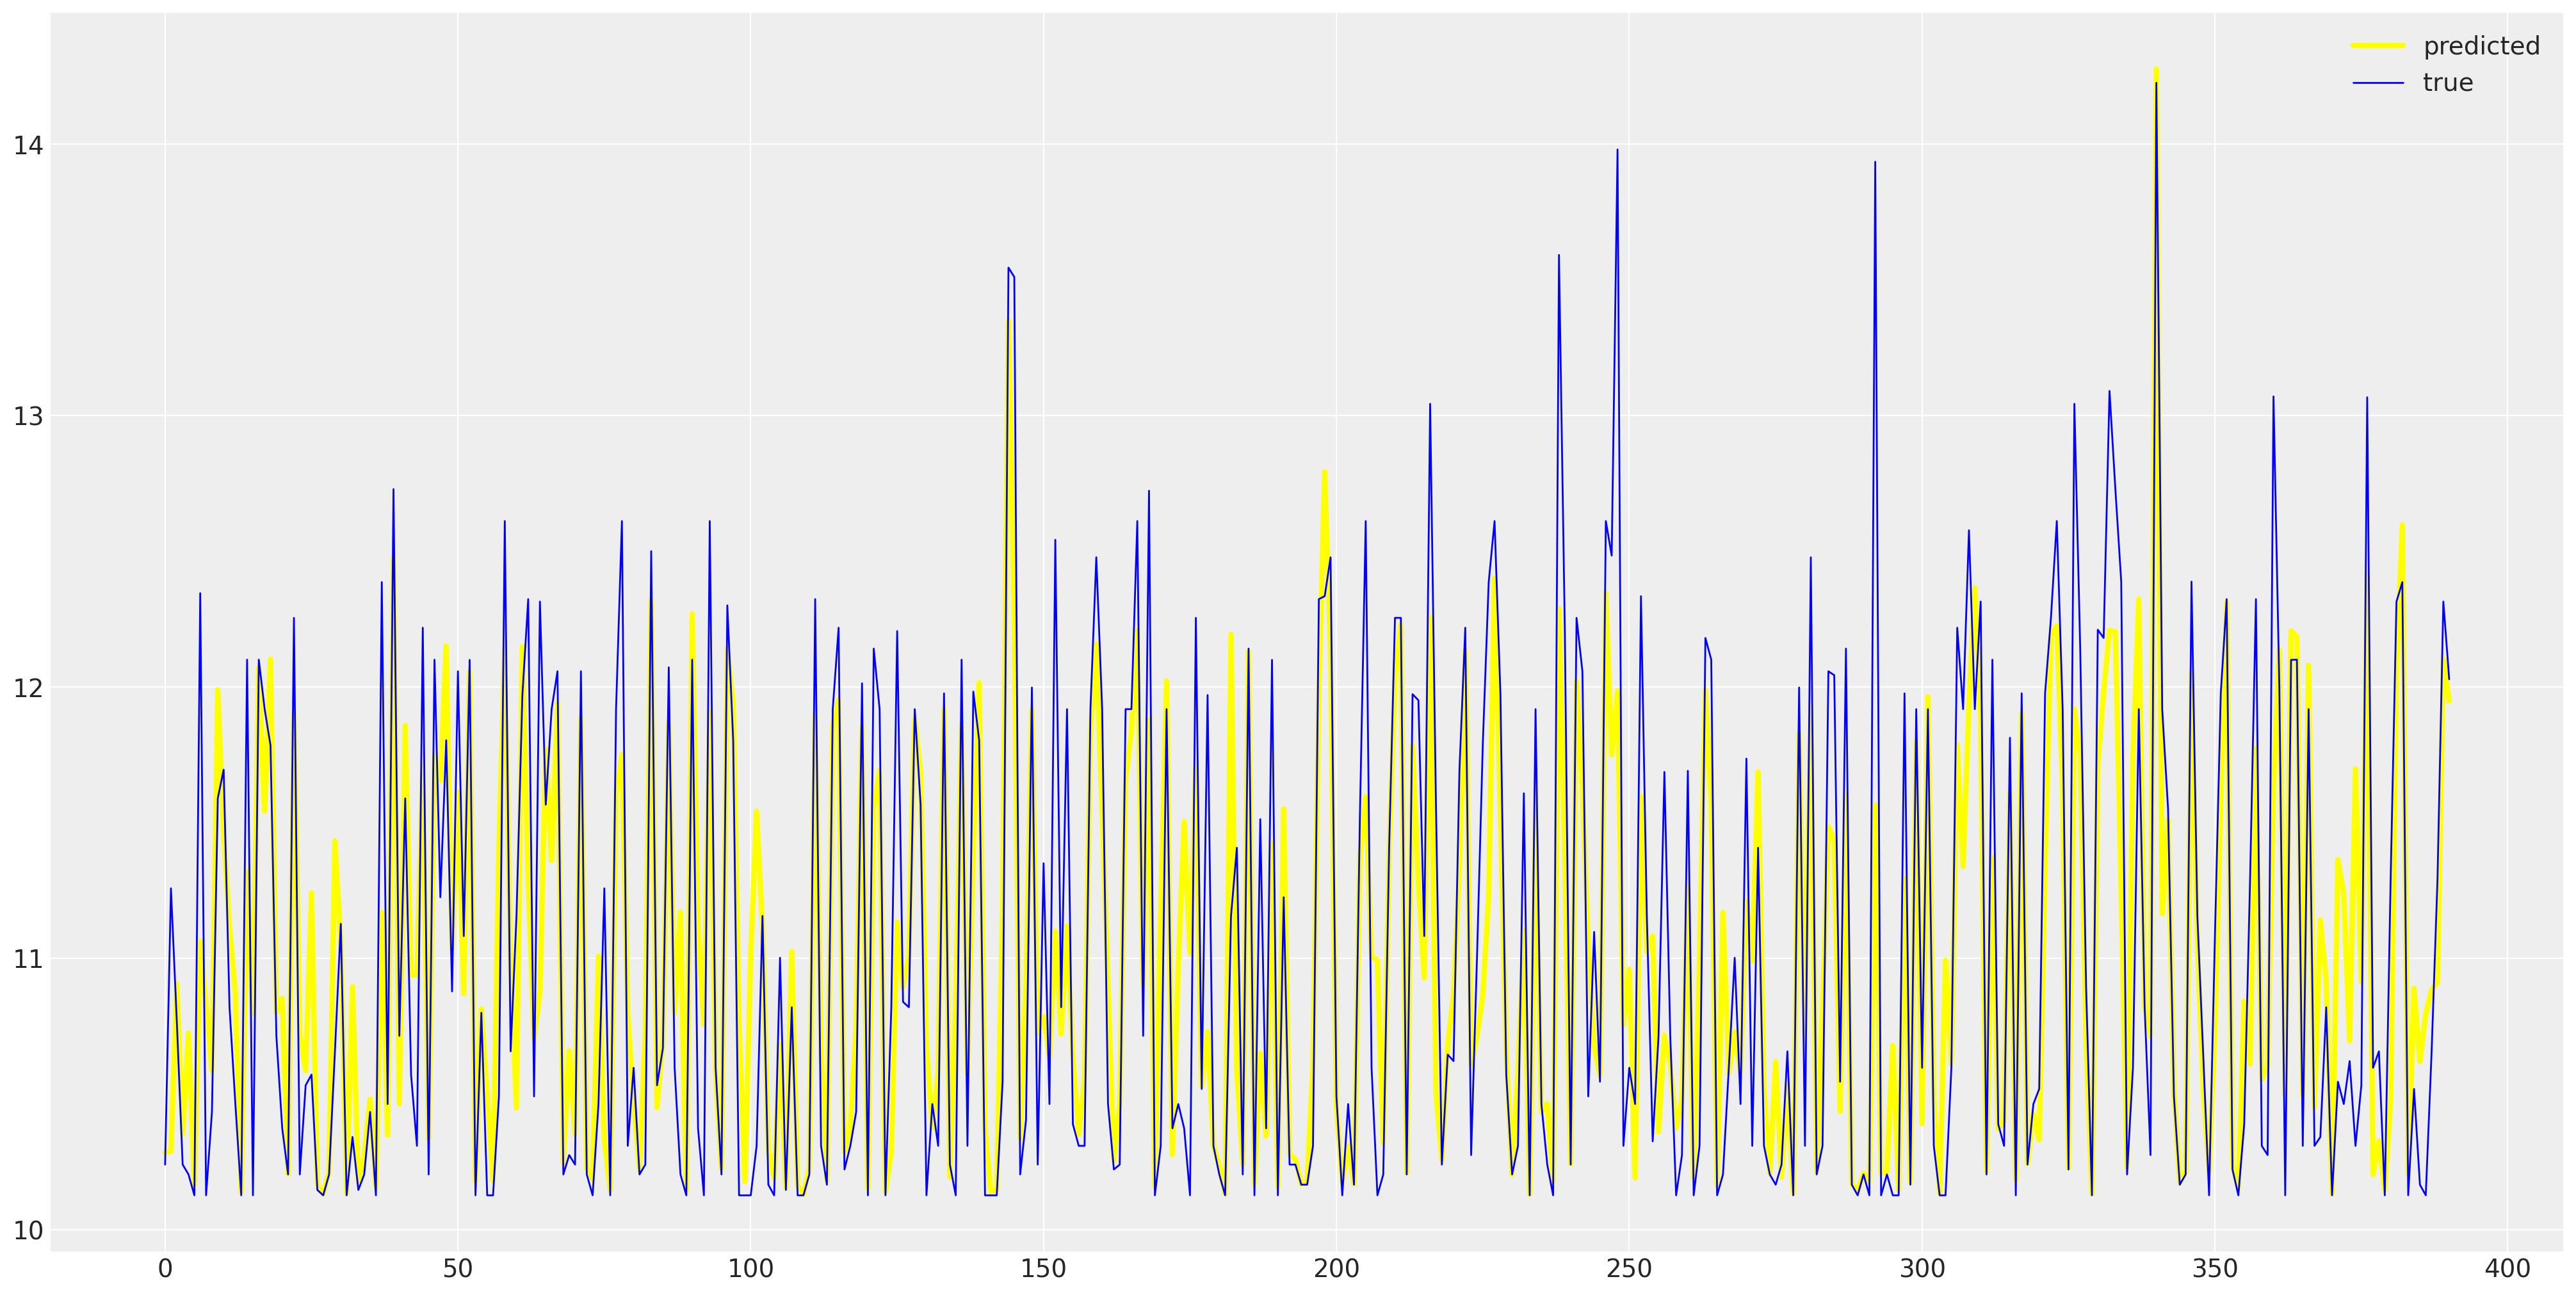

In [52]:
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
yhat = best_model.predict(dtest)

ny_test=np.array(y_test)

rmse = sqrt(mean_squared_error(y_test, yhat))

r2=r2_score(y_test, yhat)

print(f'Test Xgboost RMSE: {rmse} R2: {r2}' )

# plot forecasts against actual outcomes
plt.figure(figsize=(20,10))
plt.plot(yhat,linewidth=3,color="yellow", label="predicted")

plt.plot(ny_test, color='blue',linewidth=1, label="true")
plt.legend()
plt.show()


In [53]:
best_model.save_model('bestmodel.pkl')